# Analyzing Time Series Data with Socrata and Python

In [1]:
import os
os.getcwd()

'E:\\FA22\\TE360\\Integrative Project - 1st milestone'

## Loading datasets into our notebook

We'll start by loading a city of Chicago permits dataset into a Pandas DataFrame. We'll use the open source sodapy Python Socrata module to do this.

In [2]:
import pandas as pd
from sodapy import Socrata

# load Chicago permits data
chicago_permits_df = pd.read_csv(r'Building_Permits.csv', low_memory=False)

In the next few cells we'll do some exploration of our datasets using the `len`, `head`, and `value_counts` functions. We'll start by getting a sense of how many rows are in each of our datasets with the `len` function.

Now let's see have a peek at the first 10 rows in each of those dataset using the `head` method. You can optionally pass a parameter for the number of rows you want to print if 5 isn't enough.

In [3]:
print(len(chicago_permits_df))
chicago_permits_df.head(10)

715848


,ID,PERMIT#,PERMIT_TYPE,REVIEW_TYPE,APPLICATION_START_DATE,ISSUE_DATE,PROCESSING_TIME,STREET_NUMBER,STREET DIRECTION,STREET_NAME,...,PIN9,PIN10,COMMUNITY_AREA,CENSUS_TRACT,WARD,XCOORDINATE,YCOORDINATE,LATITUDE,LONGITUDE,LOCATION
0,1614287,100072880,PERMIT - RENOVATION/ALTERATION,STANDARD PLAN REVIEW,10/14/2005,01/03/2006,81.0,2728,N,MONTICELLO,...,NaN,NaN,NaN,NaN,NaN,1.151539e+06,1.918031e+06,41.930957,-87.718543,POINT (-87.718542820893 41.930957454144)
1,1614342,100072909,PERMIT - NEW CONSTRUCTION,STANDARD PLAN REVIEW,12/05/2005,03/29/2006,114.0,1409,S,KEDVALE,...,NaN,NaN,NaN,NaN,NaN,1.148986e+06,1.892939e+06,41.862155,-87.728575,POINT (-87.728575200899 41.862154886848)
2,1614371,100072936,PERMIT - SIGNS,SIGN PERMIT,10/17/2005,01/12/2006,87.0,120,S,LA SALLE,...,NaN,NaN,NaN,NaN,NaN,1.175112e+06,1.899771e+06,41.880356,-87.632466,POINT (-87.632466106592 41.880356217665)
3,1637148,100086388,PERMIT - RENOVATION/ALTERATION,SELF CERT,01/25/2006,01/26/2006,1.0,71,S,WACKER,...,NaN,NaN,NaN,NaN,NaN,1.173988e+06,1.899894e+06,41.880718,-87.636589,POINT (-87.636589107372 41.880717575265)
4,1637165,100086395,PERMIT - RENOVATION/ALTERATION,SELF CERT,01/21/2006,01/21/2006,0.0,4901,S,CICERO,...,NaN,NaN,NaN,NaN,NaN,1.145226e+06,1.871678e+06,41.803882,-87.742911,POINT (-87.742911007932 41.80388237071)
5,1641218,100089035,PERMIT - SIGNS,SIGN PERMIT,01/10/2006,01/10/2006,0.0,4001,W,IRVING PARK,...,NaN,NaN,NaN,NaN,NaN,1.148990e+06,1.926241e+06,41.953537,-87.727695,POINT (-87.727695188773 41.953537356864)
6,1641219,100089036,PERMIT - SIGNS,SIGN PERMIT,01/10/2006,01/10/2006,0.0,4001,W,IRVING PARK,...,NaN,NaN,NaN,NaN,NaN,1.148990e+06,1.926241e+06,41.953537,-87.727695,POINT (-87.727695188773 41.953537356864)
7,1641220,100089037,PERMIT - SIGNS,SIGN PERMIT,01/11/2006,01/11/2006,0.0,4001,W,IRVING PARK,...,NaN,NaN,NaN,NaN,NaN,1.148990e+06,1.926241e+06,41.953537,-87.727695,POINT (-87.727695188773 41.953537356864)
8,1641221,100089038,PERMIT - SIGNS,SIGN PERMIT,01/11/2006,01/11/2006,0.0,4001,W,IRVING PARK,...,NaN,NaN,NaN,NaN,NaN,1.148990e+06,1.926241e+06,41.953537,-87.727695,POINT (-87.727695188773 41.953537356864)
9,1641222,100089039,PERMIT - SIGNS,SIGN PERMIT,01/11/2006,01/11/2006,0.0,4001,W,IRVING PARK,...,NaN,NaN,NaN,NaN,NaN,1.148990e+06,1.926241e+06,41.953537,-87.727695,POINT (-87.727695188773 41.953537356864)


Printing our dataframes like this gives us a sense of what columns exist, and quick sense of some of the values in the dataset. But there's an even better way to detrmine the top values for a particular column -- the `value_counts` method.

In [4]:
chicago_permits_df["APPLICATION_START_DATE"].value_counts(dropna=False).head(10)

NaN           520
10/16/2007    365
05/25/2016    346
08/14/2019    341
03/07/2017    327
04/23/2012    321
03/30/2011    321
03/13/2006    319
09/22/2014    315
07/19/2006    314
Name: APPLICATION_START_DATE, dtype: int64

## Select a subset of a DataFrame & Deal with missing values

In [5]:
chicago_permits_df.shape

(715848, 119)

In [6]:
chicago_permits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715848 entries, 0 to 715847
Columns: 119 entries, ID to LOCATION
dtypes: float64(23), int64(2), object(94)
memory usage: 649.9+ MB


In [7]:
print(chicago_permits_df.isnull().sum())

ID                           0
PERMIT#                      0
PERMIT_TYPE                  0
REVIEW_TYPE                 10
APPLICATION_START_DATE     520
                          ... 
XCOORDINATE               1333
YCOORDINATE               1333
LATITUDE                  2208
LONGITUDE                 2208
LOCATION                  2208
Length: 119, dtype: int64


There are too many columns to analysize and we probably do not care the information in all the columns. So let's only select part of the dataframe we care about. Please make your own decision of columns selection based on what you would like to observie.

In [8]:
chicago_permits_df.columns

Index(['ID', 'PERMIT#', 'PERMIT_TYPE', 'REVIEW_TYPE', 'APPLICATION_START_DATE',
       'ISSUE_DATE', 'PROCESSING_TIME', 'STREET_NUMBER', 'STREET DIRECTION',
       'STREET_NAME',
       ...
       'PIN9', 'PIN10', 'COMMUNITY_AREA', 'CENSUS_TRACT', 'WARD',
       'XCOORDINATE', 'YCOORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object', length=119)

In [9]:
chicago_permits_df_sub = chicago_permits_df[['ID', 'PERMIT#', 'PERMIT_TYPE', 'REVIEW_TYPE', 'APPLICATION_START_DATE','STREET DIRECTION','COMMUNITY_AREA','LATITUDE', 'LONGITUDE', 'LOCATION']]

In [10]:
chicago_permits_df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715848 entries, 0 to 715847
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID                      715848 non-null  int64  
 1   PERMIT#                 715848 non-null  object 
 2   PERMIT_TYPE             715848 non-null  object 
 3   REVIEW_TYPE             715838 non-null  object 
 4   APPLICATION_START_DATE  715328 non-null  object 
 5   STREET DIRECTION        715848 non-null  object 
 6   COMMUNITY_AREA          611524 non-null  float64
 7   LATITUDE                713640 non-null  float64
 8   LONGITUDE               713640 non-null  float64
 9   LOCATION                713640 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 54.6+ MB


The value counts make it clear that a lot of the values in the "application_start_date" column are missing or null. There a variety of ways you can handle missing data, but removing incomplete rows is the simplest. In the next cell, we'll remove rows with null dates. There are also a lot of columns in the permits dataset that we won't use in this analysis. So we'll also filter down our dataset to just the columns we're interested in to reduce the amount of extraneous information.

In [11]:
chicago_permits_df_sub_notnull = chicago_permits_df_sub[chicago_permits_df_sub["APPLICATION_START_DATE"].notnull()]
chicago_permits_df_sub_notnull = chicago_permits_df_sub_notnull[["APPLICATION_START_DATE"]].reset_index(drop=True)
chicago_permits_df_sub_notnull.head(10)

,APPLICATION_START_DATE
0,10/14/2005
1,12/05/2005
2,10/17/2005
3,01/25/2006
4,01/21/2006
5,01/10/2006
6,01/10/2006
7,01/11/2006
8,01/11/2006
9,01/11/2006


### Q1

You can learn other methods to deal with missing values here: https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/

Answer the following questions:

1.1 What variables have missing values? What types/forms of missing values are they? (e.g blank, NA, N/A, -, etc.)

1.2 Please briefly describe how you deal will with these missing values and justify why you chose
these methods (Hint: common imputation methods include impute by mean/median/mode, keep and ignore the NAs, drop the observations with NAs). 

1.3 After dealing with missing values, show the dimensions of the data.

#### Q1.1

In [12]:
## TODO:Q1
print(chicago_permits_df_sub.isnull().sum().sort_values())

ID                             0
PERMIT#                        0
PERMIT_TYPE                    0
STREET DIRECTION               0
REVIEW_TYPE                   10
APPLICATION_START_DATE       520
LATITUDE                    2208
LONGITUDE                   2208
LOCATION                    2208
COMMUNITY_AREA            104324
dtype: int64


In [13]:
for x in ['REVIEW_TYPE', 'APPLICATION_START_DATE','STREET DIRECTION','COMMUNITY_AREA','LATITUDE', 'LONGITUDE', 'LOCATION']:
    print(chicago_permits_df_sub[chicago_permits_df_sub[x].isnull()].head(1)[x])    

79544    NaN
Name: REVIEW_TYPE, dtype: object
485    NaN
Name: APPLICATION_START_DATE, dtype: object
Series([], Name: STREET DIRECTION, dtype: object)
0   NaN
Name: COMMUNITY_AREA, dtype: float64
20   NaN
Name: LATITUDE, dtype: float64
20   NaN
Name: LONGITUDE, dtype: float64
20    NaN
Name: LOCATION, dtype: object


#### Q1.2

In [14]:
chicago_permits_df_sub_drop = chicago_permits_df_sub.dropna(axis=0)
print(chicago_permits_df_sub_drop.isnull().sum().sort_values())

ID                        0
PERMIT#                   0
PERMIT_TYPE               0
REVIEW_TYPE               0
APPLICATION_START_DATE    0
STREET DIRECTION          0
COMMUNITY_AREA            0
LATITUDE                  0
LONGITUDE                 0
LOCATION                  0
dtype: int64


#### Q1.3

In [15]:
chicago_permits_df_sub_drop.shape

(609599, 10)

## Print descriptive statistics

Use info() to get some basic summary about the dataframe, and also describe() helps us to get some descriptive statistics about columns containing the numeric values.

In [16]:
chicago_permits_df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715848 entries, 0 to 715847
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID                      715848 non-null  int64  
 1   PERMIT#                 715848 non-null  object 
 2   PERMIT_TYPE             715848 non-null  object 
 3   REVIEW_TYPE             715838 non-null  object 
 4   APPLICATION_START_DATE  715328 non-null  object 
 5   STREET DIRECTION        715848 non-null  object 
 6   COMMUNITY_AREA          611524 non-null  float64
 7   LATITUDE                713640 non-null  float64
 8   LONGITUDE               713640 non-null  float64
 9   LOCATION                713640 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 54.6+ MB


In [17]:
chicago_permits_df_sub.describe()

,ID,COMMUNITY_AREA,LATITUDE,LONGITUDE
count,7.158480e+05,611524.000000,713640.000000,713640.000000
mean,2.527787e+06,31.517875,41.870022,-87.672906
std,4.845136e+05,21.942573,0.083762,0.059605
min,8.766740e+05,0.000000,41.644670,-87.940225
25%,2.132719e+06,12.000000,41.803602,-87.707295
50%,2.579556e+06,28.000000,41.885830,-87.662427
75%,2.947415e+06,46.000000,41.930767,-87.631916
max,3.281920e+06,77.000000,42.022780,-87.524677


### Q2
2.1 Conduct a preliminary exploration to explore the variables of the Chicago Building Permits by calculating one of the descriptive statistics without using describe() function. (avg, std, mean… example of one variable other than the variables shown above)

2.2 Describe what you find that is unexpected or interesting.


#### Q2.1

In [18]:
## TODO: Q2
chicago_permits_df['PROCESSING_TIME'].dropna().mean()

22.636535966717368

## Aggregating based on date

For the purpose of analysizing APPLICATION_START_DATE distribution (feel free to explore other variables), in the dataframe "chicago_permits_df_sub_notnull", each row in our dataset corresponds to a permit application and the only column we've preserved is the date of the application. The task of forecasting number of permit applications is not really interesting (or reliable) at the granularity of day. Predicting at the granularity of week might be interesting, but let's start by grouping by month. To get some datatime functionality from Python, we'll convert our date column to a datetime type.

In [19]:
import datetime

fixed_dates_df = chicago_permits_df_sub_notnull.copy()
fixed_dates_df["APPLICATION_START_DATE"] = fixed_dates_df["APPLICATION_START_DATE"].apply(pd.to_datetime)
fixed_dates_df = fixed_dates_df.set_index(fixed_dates_df["APPLICATION_START_DATE"])
grouped = fixed_dates_df.resample("M").count()
data_df = pd.DataFrame({"count": grouped.values.flatten()}, index=grouped.index)
data_df.head(10)

,count
APPLICATION_START_DATE,
2001-07-31,35
2001-08-31,277
2001-09-30,104
2001-10-31,44
2001-11-30,45
2001-12-31,83
2002-01-31,36
2002-02-28,20
2002-03-31,18


## Plotting a histogram

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'COMMUNITY_AREA'}>],
       [<AxesSubplot:title={'center':'LATITUDE'}>,
        <AxesSubplot:title={'center':'LONGITUDE'}>]], dtype=object)

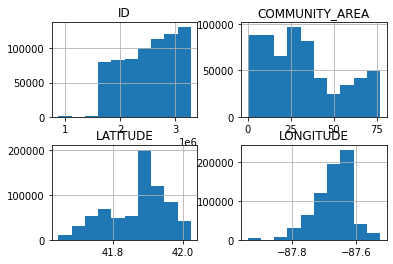

In [20]:
chicago_permits_df_sub.hist()

## Plotting a time series

<AxesSubplot:xlabel='APPLICATION_START_DATE'>

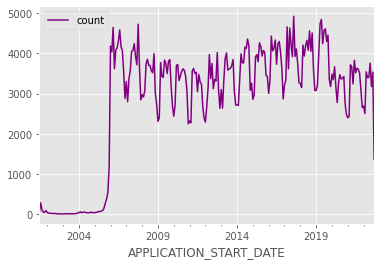

In [21]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use("ggplot")

data_df.plot(color="purple")

Notice how the number of applications in 2005 and before looks suspiciously low. My intuition is that this is a data problem. Let's remove all data from before 2006, since bad data will impact the accuracy of our model. Let's also remove data from before October of this year, since October is incomplete.

<AxesSubplot:xlabel='APPLICATION_START_DATE'>

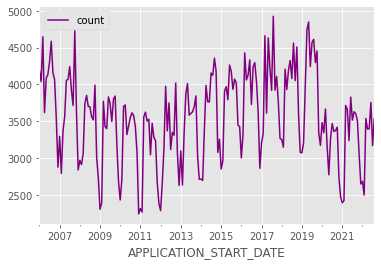

In [22]:
def is_between_2006_and_now(date):
    return date > datetime.datetime(2006, 1, 1) and date < datetime.datetime(2022, 9, 1)
#Please update the date range

data_df = data_df[data_df.index.to_series().apply(is_between_2006_and_now)]
data_df.plot(color="purple")

This plot makes two things pretty clear. First, there are some clear trends in the time series -- for example, an increase between 2011 and 2017, followed by a levelling off of permit applications. Second, there is a cyclic nature to the time series, which is indicative of there being seasonal variation in permit applications (which isn't surprising).

### Q3

Now let's make some (business) hypotheses based on what you found in Q1 – Q3. These will serve as a guide for the rest of your analysis. Not all hypotheses turn out to be correct or business-actionable, but this is how you start.
Your task here is to propose three different hypotheses that will contribute to the business analysis (think about practical business end goal). Consider carefully what variables you will use here and think about the exploratory analysis you have already done. You will assess your hypothesis in the rest of your project.
Explain briefly in words (the steps) how you plan to test your hypothesis without writing the code here.


#### Q3.1
**Hypothesis 1**  
Building fees tend to be cheaper when the location is far from the city.

I will gather the physical location of the building calculate the distance to the center of the city. I then will sort based on that distance and see whether there is a trend in price paid.

#### Q3.2
**Hypothesis 2**   
There amount of out of state customers are increasing.

I will take the top 3 contacts information into account and accumulate with respect ot time. I will then analyze the percentage of customer from out of state.

#### Q3.3
**Hypothesis 3**  
Some community areas are more favored.

I will find the number of buildings built in each community area and see whether there is a significant difference or a promising growth.